There is an interesting poaper by Laserre, Henrion, and _. 

I haven't really internalized much of the moment persepctive on things. The necessary conditions for a set of numbers to be a concistent sets of moments of a distirbution is nonintuitive to me.


However, there is a perspective in that paper which does make sense to me.



If we can approximate the indicator function (the function that is 1 on the region of interest and 0 elsewhere), then we're good.

However, there is some chicken and egg problem here. The whole reason we're doing all this is because the region is hard to handle in some way. Many function approximation methods require integration of functions in order to set up the problem.

We have an implicit representation of the region. A system of inequalities. If linear, it's a polyhedra. If polynomial its a semi agebraic set.


We get by this problem because the indicator function is kind of a sharp logical boy. We can encode it as constraints.

An overapproximatyion of the indciator function is 1. always >= 0, 2. >= 1 on the region and 3. of minimal integral

The first condition is a positive polynomial condition. The second can be achieved by  i(x) + lam g >= 1 (module getting the signs right). The third condition can by achived by integrating the individual polynomials on a known reference area. Then this is a linear objective in tyhe cofficients of our indicatro approximation $ i(x) =  \sum a_j x^j$ . $ \int dx i(x) = \sum_j a_j \int x^j dx = \sum a_j c_j$



Positives sums of raised chebyshev functions are positive by construction on the unit box.


On a sphere, rasied spherical harmonics * some kind of positive polynomial on the radius (chebyshev?) are also positive by construction and seem like a natural choice.




The bounding ellipsoid problem is one that is boyd and vanderbeghe. I believe that finding the bounding ellipse of a convex set is a convex optimization problem. Also the interior ellipse.
That's a good start.
Finding the best fitting shape of ones that we do know how to integrate.

The best bouinding box for a polyhedra can be found as an LP. For a polynomially described region, this is a polynomial optimization problem.
The best bounding parallelogram.  This might be an SDP using the PSD condition to keep the parallelogram from becoming degenerate.






In [2]:
using SumOfSquares
using DynamicPolynomials
using CSDP

┌ Info: Precompiling DynamicPolynomials [7c1d4256-1411-5781-91ec-d7bc3513ac07]
└ @ Base loading.jl:1260
┌ Info: Precompiling CSDP [0a46da34-8e4b-519e-b418-48813639ff34]
└ @ Base loading.jl:1260


(x,)

In [4]:
@polyvar x
model = SOSModel(with_optimizer(CSDP.Optimizer))

┌ Warning: `with_optimizer` is deprecated. Adapt the following example to update your code:
│ `with_optimizer(Ipopt.Optimizer)` becomes `Ipopt.Optimizer`.
│   caller = top-level scope at In[4]:1
└ @ Core In[4]:1


A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: CSDP

3-element MonomialVector{true}:
 x²
 x
 1

In [13]:


#@variable(model, l1, SOSPoly(X))




-x² + x

In [14]:
f(x => 0.5 )

0.25

In [31]:
typeof(f)

Polynomial{true,Int64}

In [43]:
integrate(f,0,1)

0.16666666666666669

integrate (generic function with 3 methods)

In [32]:
subtypes(f)

MethodError: MethodError: no method matching subtypes(::Polynomial{true,Int64})
Closest candidates are:
  subtypes(!Matched::Module, !Matched::Type) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.4/InteractiveUtils/src/InteractiveUtils.jl:223
  subtypes(!Matched::Type) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.4/InteractiveUtils/src/InteractiveUtils.jl:240

In [25]:
[e.α for e in f] #e.x

2-element Array{Int64,1}:
 -1
  1

In [29]:
[e.x.vars for e in f]

2-element Array{Array{PolyVar{true},1},1}:
 [x]
 [x]

In [30]:
[e.x.z for e in f]

2-element Array{Array{Int64,1},1}:
 [2]
 [1]

In [88]:
antidiff(f::Polynomial, x) = sum(map(e -> e.x.vars[1] * e / (e.x.z[1] + 1) , f))
integrate(f, x, a, b) = let f1 = antidiff(f, x)
                     f1(x => b) - f1(x => a) 
                     end

integrate (generic function with 3 methods)

In [111]:
@polyvar x
g = x * (0.5 - x) # relaxation
f = x * (1 - x) 
X = monomials([x], 0:4)
model = SOSModel(with_optimizer(CSDP.Optimizer))
@variable(model, p, Poly(X))
@variable(model, l1, SOSPoly(X))
@variable(model, l2, SOSPoly(X))
@constraint(model, p >= l1 * f)
@constraint(model, p >= l2 * g + 1)
@objective(model, Min, integrate(p, x, 0, 1))
optimize!(model)

# The lower bound found is 3
println(objective_value(model))

┌ Warning: `with_optimizer` is deprecated. Adapt the following example to update your code:
│ `with_optimizer(Ipopt.Optimizer)` becomes `Ipopt.Optimizer`.
│   caller = top-level scope at In[111]:5
└ @ Core In[111]:5


CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 1.00e+00 Pobj: -1.6570339e+01 Ad: 8.32e-01 Dobj: -6.8286802e-01 
Iter:  2 Ap: 1.00e+00 Pobj: -1.2869361e+01 Ad: 9.31e-01 Dobj: -3.6859356e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -2.8208529e+00 Ad: 9.18e-01 Dobj: -3.6869168e-01 
Iter:  4 Ap: 9.38e-01 Pobj: -1.0643247e+00 Ad: 8.61e-01 Dobj: -5.0649511e-01 
Iter:  5 Ap: 1.00e+00 Pobj: -8.2747052e-01 Ad: 7.73e-01 Dobj: -6.6554338e-01 
Iter:  6 Ap: 7.91e-01 Pobj: -7.6500081e-01 Ad: 8.31e-01 Dobj: -6.9027058e-01 
Iter:  7 Ap: 1.00e+00 Pobj: -7.2679618e-01 Ad: 8.19e-01 Dobj: -7.1262765e-01 
Iter:  8 Ap: 1.00e+00 Pobj: -7.2257937e-01 Ad: 9.54e-01 Dobj: -7.2139567e-01 
Iter:  9 Ap: 1.00e+00 Pobj: -7.2228201e-01 Ad: 1.00e+00 Dobj: -7.2219487e-01 
Iter: 10 Ap: 1.00e+00 Pobj: -7.2223454e-01 Ad: 1.00e+00 Dobj: -7.2225838e-01 
Iter: 11 Ap: 1.00e+00 Pobj: -7.2222477e-01 Ad: 1.00e+00 Dobj: -7.2227747e-01 
Iter: 12 Ap: 1.00e+00 Pobj: -7.2222275e-01 Ad: 1.00e+

In [91]:
value(p)

-1.9999999924307557x² + 0.999999992430762x + 1.0000000025230777

In [92]:
using Plots

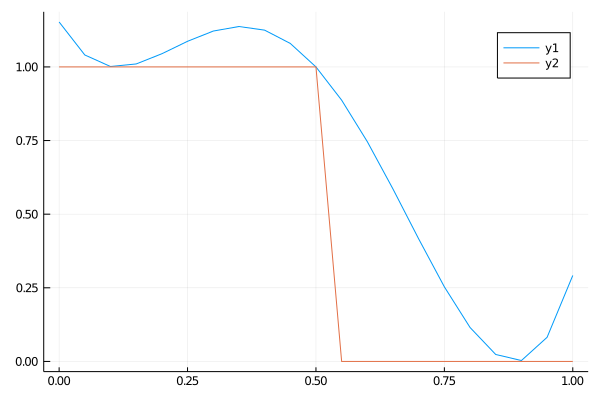

In [112]:
plot( 0:0.05:1 , [value(p)(x => x1) for x1 in  0:0.05:1] )
plot!( 0:0.05:1 , [ if (g(x => x1) >= 0) 1 else 0 end for x1   in 0:0.05:1  ]  )

In [100]:
println(objective_value(model)) # true answer is 0.5

0.7222222244349417


In [113]:
@polyvar x
g = x * (0.5 - x) # relaxation
f = x * (1 - x) 
X = monomials([x], 0:4)
model = SOSModel(with_optimizer(CSDP.Optimizer))
@variable(model, p, Poly(X))
@variable(model, l1, SOSPoly(X))
@variable(model, l2, SOSPoly(X))
@constraint(model, p <= -l1 * f + 1)
@constraint(model, p <= l2 * g)
@objective(model, Max, integrate(p, x, 0, 1))
optimize!(model)

# The lower bound found is 3
println(objective_value(model))

┌ Warning: `with_optimizer` is deprecated. Adapt the following example to update your code:
│ `with_optimizer(Ipopt.Optimizer)` becomes `Ipopt.Optimizer`.
│   caller = top-level scope at In[113]:5
└ @ Core In[113]:5


CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 8.23e-01 Pobj: -1.3941343e+01 Ad: 8.06e-01 Dobj:  4.2656375e-01 
Iter:  2 Ap: 8.50e-01 Pobj: -1.7643101e+01 Ad: 8.35e-01 Dobj:  5.2126344e-01 
Iter:  3 Ap: 5.75e-01 Pobj: -1.1198609e+01 Ad: 7.34e-01 Dobj:  6.1382039e-01 
Iter:  4 Ap: 7.82e-01 Pobj: -5.5709828e+00 Ad: 7.79e-01 Dobj:  5.8039734e-01 
Iter:  5 Ap: 7.91e-01 Pobj: -1.6594618e+00 Ad: 8.47e-01 Dobj:  5.3420108e-01 
Iter:  6 Ap: 6.76e-01 Pobj: -5.6830879e-01 Ad: 7.75e-01 Dobj:  4.4424984e-01 
Iter:  7 Ap: 7.38e-01 Pobj: -6.4867062e-02 Ad: 8.54e-01 Dobj:  3.8237897e-01 
Iter:  8 Ap: 8.46e-01 Pobj:  1.7934560e-01 Ad: 7.65e-01 Dobj:  3.0886784e-01 
Iter:  9 Ap: 7.71e-01 Pobj:  2.2667770e-01 Ad: 7.98e-01 Dobj:  2.7122939e-01 
Iter: 10 Ap: 7.61e-01 Pobj:  2.4317412e-01 Ad: 7.78e-01 Dobj:  2.5967420e-01 
Iter: 11 Ap: 7.40e-01 Pobj:  2.4872191e-01 Ad: 9.06e-01 Dobj:  2.5455748e-01 
Iter: 12 Ap: 7.78e-01 Pobj:  2.5103973e-01 Ad: 1.00e+

In [115]:
value(p)

-35.418316410795704x⁴ + 80.0041628404604x³ - 58.5391741923292x² + 13.695835953008944x - 9.068215289786963e-9

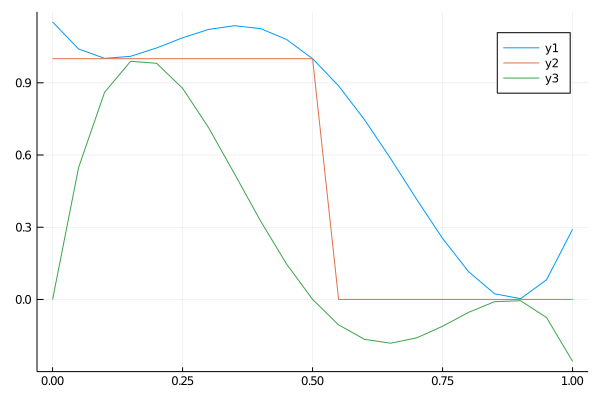

In [114]:
plot!( 0:0.05:1 , [value(p)(x => x1) for x1 in  0:0.05:1]  )

The average of these two functions is a reasonable better guess. The average of the values is somewhat close to 0.5

In [110]:
objective_value(model)

0.25223733128248615

integrate (generic function with 3 methods)

In [176]:
function cheb(n, x)
    if n == 0
        return one(typeof(x))
    elseif n == 1
        return x
    else
        acc1 = 1
        acc2 = x
        for m in 2:n
            temp = 2 * x * acc2 - acc1
            acc1 = acc2
            acc2 = temp
        end

        return acc2
    end
end

cheb (generic function with 1 method)

In [131]:
cheb(4,x)

8x⁴ - 8x² + 1

In [374]:
@code_native( cheb(4,x))

	.text
; ┌ @ In[176]:2 within `cheb'
	pushq	%rbp
	movq	%rsp, %rbp
	pushq	%r15
	pushq	%r14
	pushq	%r13
	pushq	%r12
	pushq	%rbx
	andq	$-32, %rsp
	subq	$128, %rsp
	vxorps	%xmm0, %xmm0, %xmm0
	movq	$0, 64(%rsp)
	movq	%fs:0, %rax
	leaq	-15712(%rax), %rbx
	movq	%rsi, %r15
	cmpq	$1, %rdi
	leaq	32(%rsp), %rdx
	vmovaps	%ymm0, 32(%rsp)
	movq	$12, 32(%rsp)
	movq	%rbx, 96(%rsp)
	movq	-15712(%rax), %rcx
	movq	%rcx, 40(%rsp)
	movq	%rdx, -15712(%rax)
	je	L243
	testq	%rdi, %rdi
	jne	L251
	movabsq	$140049940008016, %rdi  # imm = 0x7F5FEAECCC50
	movabsq	$jl_alloc_array_1d, %r14
; │ @ In[176]:3 within `cheb'
; │┌ @ monomial.jl:130 within `one'
; ││┌ @ DynamicPolynomials.jl:26 within `constantmonomial'
; │││┌ @ mono.jl:23 within `Monomial'
; ││││┌ @ array.jl:394 within `getindex'
; │││││┌ @ boot.jl:424 within `Array' @ boot.jl:405
	xorl	%esi, %esi
	vzeroupper
	callq	*%r14
	movabsq	$jl_system_image_data, %rdi
	xorl	%esi, %esi
	movq	%rax, %r15
	movq	%rax, 48(%rsp)
	callq	*%r14
; ││││└└
; ││││ @ mono.jl:23 w

In [136]:
# minimax optimization around inidcator function
# build minimax condition relaxed to only 
# minimax is almost certainly going to occur at transition point though
# ok in pricnple, but actuall because of the s relaxation, the transition is smoother than that
@polyvar x
g = x * (0.5 - x) # relaxation
f = x * (1 - x) 
X =  FixedPolynomialBasis([cheb(n,x) for n in 0:4])
model = SOSModel(with_optimizer(CSDP.Optimizer))
@variable(model, γ)
@variable(model, p, Poly(X))
@variable(model, l1, SOSPoly(X))
@variable(model, l2, SOSPoly(X))
@constraint(model, p <= -l1 * f + 1)
@constraint(model, p <= l2 * g)
@objective(model, Max, integrate(p, x, 0, 1))
optimize!(model)

# The lower bound found is 3
println(objective_value(model))

MethodError: MethodError: no method matching FixedPolynomialBasis(::Array{Any,1})
Closest candidates are:
  FixedPolynomialBasis(!Matched::PV) where {PT<:AbstractPolynomialLike, PV<:AbstractArray{PT,1}} at /home/philip/.julia/packages/MultivariateBases/KKez4/src/fixed.jl:41

In [135]:
monomials([x], 0:3)

4-element MonomialVector{true}:
 x³
 x²
 x
 1

In [138]:
X =  [cheb(n,x) for n in 0:4]

5-element Array{Any,1}:
 1
  x
  2x² - 1
  4x³ - 3x
  8x⁴ - 8x² + 1

In [139]:
using JuMP
using Cbc

┌ Info: Precompiling Cbc [9961bab8-2fa3-5c5a-9d89-47fab24efd76]
└ @ Base loading.jl:1260


In [148]:
model = Model(Cbc.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: COIN Branch-and-Cut (Cbc)

5-element Array{Polynomial{true,Int64},1}:
 2
 x + 1
 2x²
 4x³ - 3x + 1
 8x⁴ - 8x² + 2

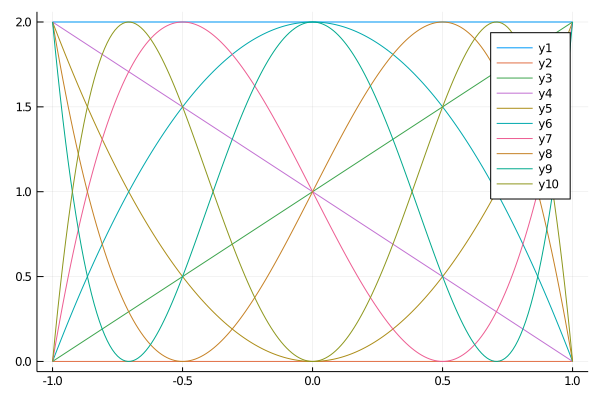

In [355]:
@polyvar x

basis = [cheb(n,x) for n in 0:4]
plot()
for i in 1:5
plot!( -1:0.01:1,  [ basis[i](x => x1) + 1 for x1 in -1:0.01:1 ]   )
   plot!( -1:0.01:1,  [ (- basis[i](x => x1)) + 1 for x1 in -1:0.01:1 ]   )
end
plot!()

In [186]:
@macroexpand(@variable(model , a[1:5] >= 0))

quote
    #= /home/philip/.julia/packages/JuMP/MnJQc/src/macros.jl:44 =#
    JuMP._valid_model(model, :model)
    #= /home/philip/.julia/packages/JuMP/MnJQc/src/macros.jl:45 =#
    begin
        #= /home/philip/.julia/packages/JuMP/MnJQc/src/macros.jl:75 =#
        JuMP._error_if_cannot_register(model, :a)
        #= /home/philip/.julia/packages/JuMP/MnJQc/src/macros.jl:79 =#
        var"#743###881" = (JuMP.Containers).container(((var"##882",)->begin
                        #= /home/philip/.julia/packages/JuMP/MnJQc/src/Containers/macro.jl:183 =#
                        JuMP.add_variable(model, JuMP.build_variable(JuMP.var"#_error#81"{Tuple{Symbol,Expr}}((:model, :(a[1:5] >= 0))), JuMP.VariableInfo(true, 0, false, NaN, false, NaN, false, NaN, false, false)), JuMP.string("a", "[", JuMP.string(var"##882"), "]"))
                    end), (JuMP.Containers).vectorized_product((JuMP.Base).OneTo(1:5)))
        #= /home/philip/.julia/packages/JuMP/MnJQc/src/macros.jl:80 =#
        (JuMP.objec

In [184]:
p = sum(a .* basis) # this is a basic positive polynomial variable

(8 a[5])x⁴ + (4 a[4])x³ + (2 a[3] - 8 a[5])x² + (a[2] - 3 a[4])x + (2 a[1] + a[2] + a[4] + 2 a[5])

In [369]:


model = Model(Cbc.Optimizer)


@polyvar x
N = 30
basis = vcat([cheb(n,x) + 1 for n in 0:N-1] , [-cheb(n,x) + 1 for n in 0:N-1] ,[(x - 1) ^ 2n for n in 0:N-1] ,  [(x) ^ 2n for n in 0:N-1] ,  [(x + 1) ^ 2n for n in 0:N-1]   )
#basis2 = [cheb(n,x) + 1 for n in 0:10]
g = (x + 0.5) * (0.5 - x) # relaxation
#f = x * (1 - x)  we don't need the domain anymore. it's intrinsic to definition of raised cehbyushev
#X = monomials([x], 0:4)

#@variable(model, p, Poly(X))
@variable(model , a[1:5N] >= 0)
p = sum(a .* basis)

#@variable(model, l1, SOSPoly(X))
@variable(model, l2a[1:5N] >= 0)
l2 = sum(l2a .* basis)

@variable(model, l3a[1:5N] >= 0)
l3 = sum(l3a .* basis)
#@constraint(model, p <= -l1 * f + 1)

@constraint(model, p == l2 * (g  - g^2 + g^3   ) + 1 + l3)

#for t in  coefficients((l2 * g + 1 + l3) - p)
#  @constraint(model, t == 0)
# end
@objective(model, Min, integrate(p, x, -1, 1))
#println(model)
optimize!(model)

# The lower bound found is 3
println(objective_value(model))


1.5553524853154919
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Jan  1 1970 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Presolve 59 (-6) rows, 400 (-50) columns and 7252 (-434) elements
Perturbing problem by 0.001% of 26494.485 - largest nonzero change 0.026439506 ( 1.168212%) - largest zero change 0.026360678
0  Obj 0 Primal inf 4.3184859 (1)
31  Obj 1.0183978 Primal inf 9.3001125 (47)
62  Obj 1.0558233 Primal inf 1.2623362 (38)
93  Obj 1.1760499 Primal inf 0.29292219 (36)
124  Obj 1.3130697 Primal inf 0.0080179149 (16)
156  Obj 1.5515608 Primal inf 0.0024114397 (16)
161  Obj 1.5593858
Optimal - objective value 1.5588844
After Postsolve, objective 1.5588844, infeasibilities - dual 6.0094668e-05 (2), primal 1.9118645e-07 (1)
Presolved model was optimal, full model needs cleaning up
0  Obj 1.5588844 Dual inf 4585.5661 (9)
0  Obj 1.5588844 Dual inf 4585.5661 (9)
30  Obj 1.5553525
Optimal - objective value 1.5553525
Optimal objective 1.555352485 - 19

In [343]:
value(p)

-0.0011672082055643148x²⁹ + 0.008462259490341283x²⁷ - 0.02758279294157136x²⁵ - 6771.206496383098x²⁴ + 0.05333624176293489x²³ + 40627.238978298585x²² - 0.06799810434788471x²¹ - 105450.14175419156x²⁰ + 0.06009820896354024x¹⁹ + 154834.35146988745x¹⁸ - 0.03771092570074511x¹⁷ - 141351.77762957543x¹⁶ + 0.01693189406908076x¹⁵ + 83300.63046026144x¹⁴ - 0.005416362216811275x¹³ - 32070.539427451004x¹² + 0.001214910469267724x¹¹ + 8064.059083680837x¹⁰ - 0.00018530937676187857x⁹ - 1290.6708796665098x⁸ + 1.8201326205672873e-5x⁷ + 110.08997006679175x⁶ - 1.041691170728751e-6x⁵ - 2.875939654650651x⁴ + 2.8572548664767622e-8x³ + 0.12753174876393544x² - 2.4606184907790806e-10x + 1.0003245014457363

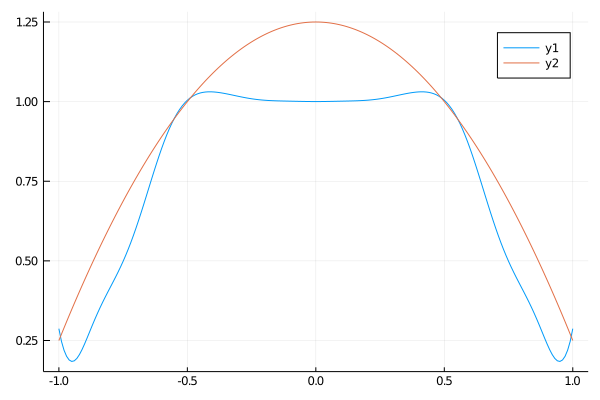

In [370]:
plot( -1:0.01:1,  [ value(p)(x => x1) for x1 in -1:0.01:1 ]   )
plot!( -1:0.01:1,  [ g(x => x1) + 1 for x1 in -1:0.01:1 ]   )

In [207]:
 coefficients((l2 * g + 1 + l3) - p)

10-element Array{GenericAffExpr{Float64,VariableRef},1}:
 256 l3a[10]
 128 l3a[9]
 64 l3a[8] - 576 l3a[10]
 8 l2a[5] + 32 l3a[7] - 256 l3a[9]
 -8 l2a[5] + 4 l2a[4] + 16 l3a[6] - 112 l3a[8] + 432 l3a[10]
 -6 l2a[5] - 4 l2a[4] + 2 l2a[3] + 8 l3a[5] - 48 l3a[7] + 160 l3a[9] - 8 a[5]
 -2 l2a[4] - 2 l2a[3] + 8 l2a[5] + l2a[2] + 4 l3a[4] - 20 l3a[6] + 56 l3a[8] - 120 l3a[10] - 4 a[4]
 0.5 l2a[3] + 0 l2a[5] + 0 l2a[2] + 4 l2a[4] + 2 l2a[1] + 2 l3a[3] - 8 l3a[5] + 18 l3a[7] - 32 l3a[9] - 2 a[3] + 8 a[5]
 -0.75 l2a[2] - 1.75 l2a[4] - 2 l2a[1] - 2 l2a[5] + l3a[2] - 3 l3a[4] + 5 l3a[6] - 7 l3a[8] + 9 l3a[10] - a[2] + 3 a[4]
 0.5 l2a[1] + 0.25 l2a[2] + 0.25 l2a[4] + 0.5 l2a[5] + 2 l3a[1] + l3a[2] + l3a[4] + 2 l3a[5] + l3a[6] + l3a[8] + 2 l3a[9] + l3a[10] - 2 a[1] - a[2] - a[4] - 2 a[5] + 1

In [204]:
l3

(8 l3a[5])x⁴ + (4 l3a[4])x³ + (2 l3a[3] - 8 l3a[5])x² + (l3a[2] - 3 l3a[4])x + (2 l3a[1] + l3a[2] + l3a[4] + 2 l3a[5])

In [185]:
sum(@variable(model , [1:5] >= 0) .* basis)

LoadError: In `@variable(model, [1:5] >= 0)`: Cannot use explicit bounds via >=, <= with an anonymous variable

In [189]:
a = @variable(model, [1:5])
@constraint(model , a .>= 0)
integrate(p )

5-element Array{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.GreaterThan{Float64}},ScalarShape},1}:
 noname ≥ 0.0
 noname ≥ 0.0
 noname ≥ 0.0
 noname ≥ 0.0
 noname ≥ 0.0

In [178]:
for i in 1:5
println(typeof(basis[i]))
end

Polynomial{true,Int64}
Polynomial{true,Int64}
Polynomial{true,Int64}
Polynomial{true,Int64}
Polynomial{true,Int64}


## Circle


In [416]:
#antidiff(f::Polynomial, x) = sum(map(e -> e.x.vars[1] * e / (e.x.z[1] + 1) , f))
antidiff(f, x) = sum([ sum([ e.x.vars[i] * e / (e.x.z[i] + 1) for i in 1:length(e.x.vars) if e.x.vars[i] == x ]) for e in f])
integrate(f, x, a, b) = let f1 = antidiff(f, x)
                     subs(f,x => b) - subs(f1,x => a) 
                     end

integrate (generic function with 3 methods)

In [391]:
antidiff( x*y + 3x^2 + 7y + y^2, y)

1-element Array{Polynomial{true,Float64},1}:
 3.0x²y + 0.5xy² + 0.3333333333333333y³ + 3.5y²

In [418]:
p = integrate(x*y + 3x^2 + 7y + y^2, y, -1,1)
[println(e.x.vars)  for e in p[1] ]
p

PolyVar{true}[x]
PolyVar{true}[x]
PolyVar{true}[x]


1-element Array{Polynomial{true,Float64},1}:
 6.0x² + 0.5x + 4.833333333333334

In [397]:
integrate( integrate(x*y + 3x^2 + 7y + y^2, y, -1,1) , x, -1,1 )

ErrorException: type MonomialVector has no field z

In [379]:
zip([1,2,3], [3,4,5])

Base.Iterators.Zip{Tuple{Array{Int64,1},Array{Int64,1}}}(([1, 2, 3], [3, 4, 5]))

In [382]:
Array(1:length([1,2,3]))

3-element Array{Int64,1}:
 1
 2
 3

In [428]:
typeof(integrate(integrate(p, x, -1, 1)[1] ,y,-1,1)[1][1].α)

GenericAffExpr{Float64,VariableRef}

In [447]:
@polyvar x y
g = 0.5 - x^2 - y^2 # relaxation
f = (x + 1) * (1 - x) * (y + 1) * (1-y)
X = monomials([x,y], 0:5)
model = SOSModel(with_optimizer(CSDP.Optimizer))
@variable(model, p, Poly(X))
@variable(model, l1, SOSPoly(X))
@variable(model, l2, SOSPoly(X))
@constraint(model, p >= l1 * f)
@constraint(model, p >= l2 * g + 1)
@objective(model, Min, integrate(integrate(p, x, -1, 1)[1] ,y,-1,1)[1][1].α)
optimize!(model)

# The lower bound found is 3
println(objective_value(model))

┌ Warning: `with_optimizer` is deprecated. Adapt the following example to update your code:
│ `with_optimizer(Ipopt.Optimizer)` becomes `Ipopt.Optimizer`.
│   caller = top-level scope at In[447]:5
└ @ Core In[447]:5


CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  3.5527137e-14 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 6.83e-01 Pobj: -1.5600762e+02 Ad: 4.07e-01 Dobj: -2.1541168e+00 
Iter:  2 Ap: 6.42e-01 Pobj: -2.6657620e+02 Ad: 7.95e-01 Dobj:  8.2995235e-01 
Iter:  3 Ap: 6.11e-01 Pobj: -1.3608127e+02 Ad: 7.61e-01 Dobj: -2.7865596e-01 
Iter:  4 Ap: 8.17e-01 Pobj: -1.2202174e+02 Ad: 7.03e-01 Dobj: -5.2233550e-01 
Iter:  5 Ap: 8.29e-01 Pobj: -6.8986381e+01 Ad: 7.70e-01 Dobj: -3.2738725e-01 
Iter:  6 Ap: 8.39e-01 Pobj: -2.5518445e+01 Ad: 8.67e-01 Dobj: -3.2217716e-01 
Iter:  7 Ap: 8.79e-01 Pobj: -6.1379880e+00 Ad: 8.68e-01 Dobj: -3.6347166e-01 
Iter:  8 Ap: 8.54e-01 Pobj: -1.9370378e+00 Ad: 8.67e-01 Dobj: -4.6563770e-01 
Iter:  9 Ap: 7.10e-01 Pobj: -1.3710056e+00 Ad: 6.32e-01 Dobj: -6.9461765e-01 
Iter: 10 Ap: 5.60e-01 Pobj: -1.1506879e+00 Ad: 8.50e-01 Dobj: -7.5931115e-01 
Iter: 11 Ap: 6.83e-01 Pobj: -9.6847284e-01 Ad: 7.87e-01 Dobj: -7.7867663e-01 
Iter: 12 Ap: 7.63e-01 Pobj: -9.0268768e-01 Ad: 6.58e-

In [444]:
π * (0.5 ^2)

0.7853981633974483

In [448]:
value(p)

-0.00010982877527603713x⁵ - 0.0061181147912760594x⁴y + 0.014585904282289078x³y² + 0.014585904281481939x²y³ - 0.006118114791651093xy⁴ - 0.00010982877521428097y⁵ + 0.010774933910113242x⁴ + 0.00327982664979546x³y + 1.9708633403567648x²y² + 0.0032798266504321383xy³ + 0.0107749339097502y⁴ - 0.022180543330380824x³ + 0.0022887239941412132x²y + 0.002288723993812032xy² - 0.022180543329720755y³ - 1.991405318132472x² - 0.008302595786551022xy - 1.9914053181322913y² + 0.011081359709561193x + 0.01108135970921726y + 1.9930455433528145

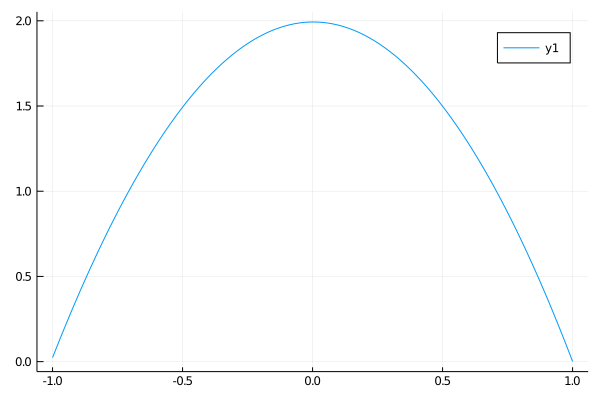

In [449]:
plot( -1:0.01:1,  [ value(p)(x => x1, y => 0) for x1 in -1:0.01:1 ]   )

You know, i never revisisted the moment formulation

In [459]:
Tuple{1.3, 4.5}

Tuple{1.3,4.5}

In [140]:
using Z3

┌ Info: Precompiling Z3 [06b161dc-0161-11ea-0f74-41f836f4024b]
└ @ Base loading.jl:1260


In [141]:
ctx = Context()
x = real_const(ctx, "x")
y = real_const(ctx, "y")

s = Solver(ctx, "QF_NRA")
add(s, x == y^2)
add(s, x > 1)

res = check(s)
@assert res == Z3.sat

m = get_model(s)

for (k, v) in consts(m)
    println("$k = $v")
end

y = 2.0
x = 4.0


In [145]:
? Z3

search: Z3



No documentation found.

No docstring found for module `Z3`.


In [147]:
for n in names(Z3)
    println(n)
end

ApplyResult
ApplyResultDereferenced
Ast
AstDereferenced
AstVector
AstVectorTpl
AstVectorTplDereferenced
CheckResult
Config
ConfigDereferenced
Context
ContextDereferenced
ExprDereferenced
ExprVector
Fixedpoint
FixedpointDereferenced
FuncDecl
FuncDeclDereferenced
FuncDeclVector
FuncEntry
FuncEntryDereferenced
FuncInterp
FuncInterpDereferenced
Goal
GoalDereferenced
Model
ModelDereferenced
Object
ObjectDereferenced
Optimize
OptimizeDereferenced
OptimizeHandle
OptimizeHandleDereferenced
ParamDescrs
ParamDescrsDereferenced
Params
ParamsDereferenced
Probe
ProbeDereferenced
RoundingMode
Solver
SolverDereferenced
SolverSimple
SolverSimpleDereferenced
SolverTranslate
SolverTranslateDereferenced
Sort
SortDereferenced
SortVector
Stats
StatsDereferenced
SymbolDereferenced
Tactic
TacticDereferenced
Z3
add
add_const_interp
add_cover
add_entry
add_fact
add_func_interp
add_rule
algebraic_i
algebraic_lower
algebraic_poly
algebraic_upper
and
apply
arg
arity
array_domain
array_range
array_sort
as_expr
ass